In [1]:
import numpy as np
import cv2 as cv
import math 
import skimage
from skimage import io, restoration,data
from matplotlib import pyplot as plt
from PIL import Image


# Reduce the Intensity

enter:4


<Figure size 640x480 with 0 Axes>

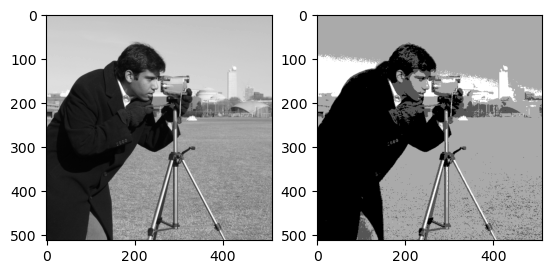

In [3]:
image1 = data.camera()

levels = int(input("Enter:"))
div = 255/(levels - 1)

image3 = np.round(image1/div)*255
plt.gray()
fig,arr1= plt.subplots(1,2)



arr1[0].imshow(image1)
arr1[1].imshow(image3)


# Simple spatial filter for Blur

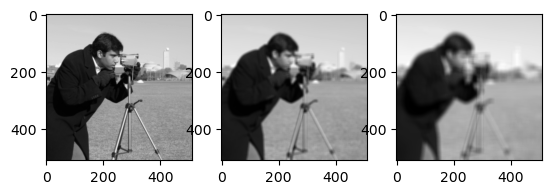

In [4]:
fig,arr2= plt.subplots(1,3)


arr2[0].imshow(cv.blur(image1,(3,3)))
arr2[1].imshow(cv.blur(image1,(10,10)))
arr2[2].imshow(cv.blur(image1,(20,20)));



# Rotate the Image

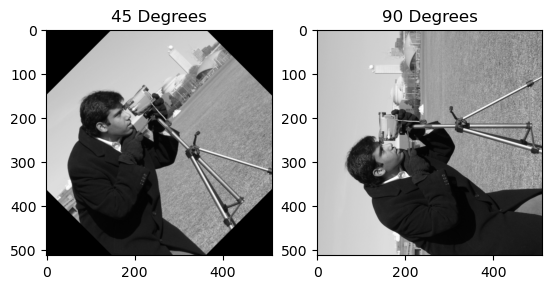

In [18]:
# Rotate the image by 45 degrees
image45 = cv.getRotationMatrix2D((image1.shape[1]/2, image1.shape[0]/2), 45, 1.0)
rotated_image45 = cv.warpAffine(image1, image45, (image1.shape[1], image1.shape[0]))

# Rotate the image by 90 degrees
image90 = cv.getRotationMatrix2D((image1.shape[1]/2, image1.shape[0]/2), 90, 1.0)
rotated_image90 = cv.warpAffine(image1, image90, (image1.shape[1], image1.shape[0]))

# Create a figure with subplots for the rotated images
fig, axarr = plt.subplots(1, 2)

# Show the rotated images
axarr[0].imshow(cv.cvtColor(rotated_image45, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(rotated_image90, cv.COLOR_BGR2RGB))

# Add labels to the subplots
axarr[0].set_title("45 Degrees")
axarr[1].set_title("90 Degrees")

# Show the figure
plt.show()

#  Reducing the image spatial resolution

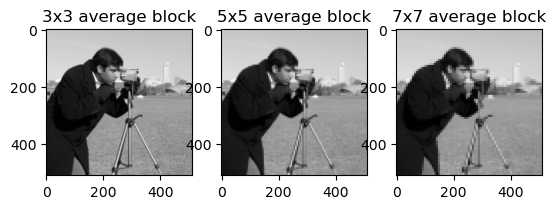

In [55]:
im=image1
STRIDE = (3,5,7)
rows,cols = im.shape

f, axarr = plt.subplots(1, len(STRIDE))
for i,S in enumerate(STRIDE):
    im_mod = im.copy()
    for r in range(int(S/2),rows,S):
        for c in range(int(S/2),cols,S):
            im_mod[r-int(S/2):r+int(S/2)+1,c-int(S/2):c+int(S/2)+1] = np.average(im[r-int(S/2):r+int(S/2)+1,c-int(S/2):c+int(S/2)+1])
    axarr[i].imshow(im_mod);
    axarr[i].set_title('{}x{} average block'.format(S,S))
